# Previsão de séries temporais: Método Theta e expansões

por **Cibele Russo**




Baseado em

- Assimakopoulos, V., & Nikolopoulos, K. (2000). The theta model: a decomposition approach to forecasting. International Journal of forecasting, 16(4), 521-530.

Implementações:

- https://github.com/MinhDg00/theta/tree/master/src (em Python)

- https://cran.r-project.org/web/packages/forecast/forecast.pdf (em R)

- https://cran.r-project.org/web/packages/forecTheta/forecTheta.pdf (em R)

Leituras adicionais:

- Fiorucci, J. A., Pellegrini, T. R., Louzada, F., Petropoulos, F., & Koehler, A. B. (2016). Models for optimising the theta method and their relationship to state space models. International Journal of Forecasting, 32(4), 1151-1161. Disponível em https://www.sciencedirect.com/science/article/pii/S0169207016300243. Acessado em 06/08/2020.

- Fiorucci, J. A. (2016). Time series forecasting:advances on Theta method. Tese de doutorado. Disponível em https://repositorio.ufscar.br/bitstream/handle/ufscar/7399/TeseJAF.pdf?sequence=1&isAllowed=y. Acessado em 06/08/2020.

- Pellegrini, T. R. Uma avaliação de métodos de previsão aplicados à grandes quantidades de séries temporais univariadas. Dissertação de mestrado. Universidade Federal de São Carlos. 2012. Disponível em https://repositorio.ufscar.br/bitstream/handle/ufscar/4563/4757.pdf?sequence=1&isAllowed=y. Acessado em 06/08/2020.

- Hyndman, R. J., Koehler, A. B., Snyder, R. D., & Grose, S. (2002). A state space framework for automatic forecasting using exponential smoothing methods. International Journal of forecasting, 18(3), 439-454.




## Método Theta

- O método Theta é simples e preciso para se fazer previsão (forecasting) em séries temporais.


- Premiado na Competição M3 de forecasting https://en.wikipedia.org/wiki/Makridakis_Competitions


- Suposição: A série é não-sazonal ou dessazonalizada


- Tem relação com o método de Suavização exponencial simples (SES)


**Resumo do Metodo Theta**


1. O método decompõe a série temporal original em duas novas linhas através dos chamados coeficientes Theta, que são aplicados à segunda diferença dos dados. Em outras palavras, o processo de decomposição tem a vantagem de explorar informações nos dados que geralmente não podem ser capturados e modelados completamente através da extrapolação da série temporal original. 


3. As chamadas Linhas-Theta podem ser consideradas como novas séries temporais e são extrapoladas separadamente usando um método de previsão apropriado. 


4. Concluída a extrapolação de cada Linha Theta, a recomposição ocorre por meio de um esquema de combinação, a fim de calcular as previsões pontuais da série temporal original. 


5. A combinação das Linhas Theta é considerada para a previsão.




Os passos do algoritmo para a implementação (Pellegrini, 2012) são


1. **Teste de Sazonalidade**: Teste cada série temporal para verificar a existência de comportamento sazonal via teste para a função de autocorrelação, com lag de um ano para séries anuais, lag de 12 meses para séries mensais e lag de 4 meses para séries trimetrais.  

    De uma forma geral, a série é considerada sazonal se
    
    $$|r_m| > q_{1-a/2}\sqrt{\displaystyle\frac{1+2\sum_{i=1}^{m-1}r_i^2}{n}}$$ 
    
    em que $r_k$ é a função e autocorrelação de lag $k$, $m$ é o número de períodos do ciclo sazonal (por exemplo, 12 meses em uma sazonalidade anual), $n$ é o tamanho amostral, $q$ é o quantil da distribuição normal e $(1-a/2)$ é o nível de confiança do teste. Se a série for identificada como sazonal, é necessário fazer uma decomposição para eliminar a sazonalidade.  


2. **Dessazonalização**: Dessazonalize as séries temporais identificadas no passo 1 através do método de decomposição clássica (multiplicativo).


3. **Decomposição**: Cada série temporal é decomposta em duas linhas-Theta, $Z_t(0)$ e $Z_t(2)$.


4. **Extrapolação**: $Z_t(0)$ e $Z_t(2)$ são extrapoladas respectivamente através do modelo de regressão linear e do modelo de alisamento exponencial simples.


5. **Combinação**: As previsões produzidas por $\widehat{Z}_{t+h}(0)$ e $\widehat{Z}_{t+h}(2)$ são combinadas a partir da média aritmética.


6. **Resazonalização**: As previsões do passo anterior são resazonalizadas resultando nas previsões finais.


## O Método Theta 


O método Theta é baseado no conceito de modificação das curvaturas locais da série temporal.   Esta  mudança  é  obtida  a  partir  de  um  coeficiente,  denominado  coeficiente Theta,  denotado  pela  letra  grega  $\theta$. 


Originalmente, Assimakopoulos & Nikolopoulos (2000) propuseram a Linha Theta como a solução da equação

$$\Delta^2 Z_t(\theta) = \theta \Delta^2 Y_t, t=3,\ldots,n$$


em que 

$Y_1,\ldots, Y_n$ é a série original (não sazonal ou dessazonalizada) e $\Delta$ é o operador diferença 

$$\Delta Z_t = Z_t - Z_{t-1}.$$

Os valores iniciais de $Z_1$ e $Z_2$ são obtidos minimizando

$$\sum_{t=1}^{n} [Y_t - Z_t(\theta)]^2$$

Entretanto, uma solução analítica para calcular $Z(\theta)$ é dada por

$$Z_t(\theta) = \theta Y_t + (1-\theta)(A_n + B_n t), \ t=1,\ldots, n$$

em que $A_n$ e $B_n$ são coeficientes de mínimos quadrados de um modelo de regressão linear de $Y_1,\ldots, Y_n$ contra $1,\ldots,n$ (as expressões são dadas em Fiorucci (2016)).

## Generalizações para o Método Theta 

- Existem algumas propostas de generalização do Método Theta na literatura

- Modelos para otimizar o Método Theta são apresentados por Fiorucci et. al (2016)

### Modelo Theta Otimizado

- Algumas adaptações são feitas e o modelo é reescrito como um modelo de espaço de estado (Fioruci et. al, 2016)

$\begin{array}{lll}
Y_t &=& \mu_t + \epsilon_t,\\
\mu_t &= & {{l}}_{t-1} + \left(1-\displaystyle{\frac{1}{\theta}}\right) \left\{(1-\alpha)^{t-1} A_n + \left[\displaystyle\frac{1-(1-\alpha)^t}{\alpha}\right] B_n\right\},\\
{l}_t &=& \alpha Y_t + (1-\alpha){l}_{t-1}
\end{array}$

com parâmetros ${l}_0 \in \mathbb{R}$, $\alpha\in(0,1)$ e $\theta\in[1,\infty]$.




A previsão pra $h$ passos à frente com origem em n é dada por

$\begin{array}{lll}\widehat{Y}_{n+h|n} &=& E[Y_{n+h}|Y_1,\ldots,Y_n]\\
&=&{l}_n + \left(\displaystyle 1-\frac{1}{\theta}\right)\times \\
&& \left\{(1-\alpha)^n A_n + \left[(h-1)+\displaystyle\frac{1-(1-\alpha)^{n+1}}{\alpha}\right] B_n\right\}\end{array}$

Além disso, é possível obter um intervalo de predição com nível de confiança de $(1-a)\%$

$\widehat{Y}_{n+h|n} \pm q_{1-a/2}\sqrt{[1+(h-1)\alpha^2]\sigma^2}$.

Se $\theta = 2$ é possível mostrar que este método produz as mesmas previsões do método usual.


### Modelo Theta Otimizado dinâmico

- Ver Fiorucci et al. (2016)

- $A_n$ e $B_n$, que antes eram considerados coeficientes fixos, agora são considerados funções dinâmicas, isto é, para atualizar do estado $t$ para o estado $t+1$ consideramos somente a informação prévia $Y_1,\ldots, Y_t$ para calcular $A_t$ e $B_t$, e então usamos esses termos no lugar de $A_n$ e $B_n$.

Assim, 


$\begin{array}{lll}\widehat{Y}_{t+1|t} &=& {l}_t + \left(\displaystyle 1-\frac{1}{\theta}\right)\times \\
&& \left\{(1-\alpha)^t A_t + \left[\displaystyle\frac{1-(1-\alpha)^{t+1}}{\alpha}\right] B_t\right\}\end{array}$

Então, assumindo erros aditivos um passo à frente, temos

$\begin{array}{lll}
Y_t &=& \mu_t + \epsilon_t,\\
\mu_t &= & {l}_{t-1} + \left(1-\displaystyle{\frac{1}{\theta}}\right) \left\{(1-\alpha)^{t-1} A_{t-1} + \left[\displaystyle\frac{1-(1-\alpha)^t}{\alpha}\right] B_{t-1}\right\}\\
{l}_t &=&\alpha Y_t + (1-a){l}_{t-1}.\end{array}$


As expressões para $A_t$, $B_t$, tal como valores iniciais podem ser vistas em Fiorucci et al. (2016).

## Aplicação do Método Theta em Python

In [4]:
# Implement standard Theta method of Assimakopoulos and Nikolopoulos (2000)
# Fonte https://github.com/MinhDg00/theta/tree/master/src

# This is Python implementation of thetaf() function in R by Prof. Hyndman 
# https://github.com/robjhyndman/forecast/blob/master/R/theta.R

# The standard theta method of Assimakopoulos and Nikolopoulos (2000) is equivalent to 
# simple exponential smoothing with drift. This is demonstrated in Hyndman and Billah (2003)

# Step 1: Check for seasonality
# Step 2: Decompose Seasonality if it is deemed seasonal
# Step 3: Applying Theta Method
# Step 4: Reseasonalize the resulting forecast


import sys
import numpy as np 
import pandas as pd 
import statsmodels as sm 
import warnings 
from scipy.stats import norm 
from statsmodels.tsa.stattools import acf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.linear_model import LinearRegression

def sesThetaF(y, s_period , h = 10, level = np.array([90,95,99])):
	"""
	@param y : array-like time series data
	@param s_period : the no. of observations before seasonal pattern repeats
	@param h : number of period for forcasting
	@param level: confidence levels for prediction intervals
	"""
	if not s_period:
		print('ERROR: s_period variable only accepts positve integer.')
		sys.exit()


	fcast = {} # store result
	# Check seasonality
	x = y.copy()
	n = y.index.size
	m = s_period 

	if m > 1 and n > 2 * m:
		r = (acf(x, nlags = m))[1:]
		temp = np.delete(r, m-1)
		stat = np.sqrt((1+ 2 * np.sum(np.square(temp))) / n)
		seasonal = (abs(r[m-1])/stat) > norm.cdf(0.95)
	else:
		seasonal = False

	# Seasonal Decomposition
	origx = x.copy()
	if seasonal:
		decomp = seasonal_decompose(x, model = 'multiplicative')
		if decomp.seasonal < 1e-10 :
			warnings.warn('Seasonal indexes equal to zero. Using non-seasonal Theta method')
		else:
			x = decomp.observed/decomp.seasonal

	# Find theta lines
	model = SimpleExpSmoothing(x).fit()
	fcast['mean'] = model.forecast(h)
	num = np.array(range(0,n))
	temp = LinearRegression().fit(num.reshape(-1,1),x).coef_
	temp = temp/2
	alpha = np.maximum(1e-10, model.params['smoothing_level'])
	fcast['mean'] = fcast['mean'] + temp * (np.array(range(0,h)) + (1 - (1 - alpha)**n)/alpha)

	# Reseasonalize
	if seasonal:
		fcast['mean'] = fcast['mean'] *  np.repeat(decomp.seasonal[-m:], (1 + h//m))[:h]
		fcast['fitted'] = model.predict(x.index[0], x.index[n-1]) * decomp.seasonal
	else:
		fcast['fitted'] = model.predict(x.index[0], x.index[n-1])

	fcast['residuals'] = origx - fcast['fitted']

	return fcast
	# Prediction Intervals

In [5]:
## Implementação
# Fonte: https://github.com/MinhDg00/theta/tree/master/src
# Baseado em Fiorucci et. al (2016) https://github.com/cran/forecTheta

# Implement standard Theta method based on Fiorucci et al. (2016) 
# Reference: https://github.com/cran/forecTheta

import sys
import numpy as np 
import pandas as pd 
import statsmodels as sm 
import warnings 
from scipy.stats import norm 
from statsmodels.tsa.stattools import acf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.linear_model import LinearRegression


def sThetaF(y, s_period = 1, h = 10, s = None):
	"""
	@param y : array-like time series data
	@param s_period : the no. of observations before seasonal pattern repeats
	@param h : number of period for forcasting
	@s : additive or multiplicative 
	"""
	fcast = {} # store result
	n = y.index.size
	x = y.copy()
	m = s_period
	time_y = np.array(np.arange(n))/m + 1
	time_fc = time_y[n-1] + np.array(np.arange(1,h+1))/m

	s_type = 'multiplicative'
	if s is not None:
		if s == 'additive':
			s = True
			s_type = 'additive'

	# Seasonality Test & Decomposition
	if s is not None and m >= 4:
		r = (acf(x, nlags = m+1))[1:]
		clim = 1.64/sqrt(n) * np.sqrt(np.cumsum([1, 2 * np.square(r)]))
		s = abs(r[m-1]) > clim[m-1]
	else:
		if not s:
			s = False


	if s: 
		decomp = seasonal_decompose(x, model = s_type)
		if s_type == 'additive' or (s_type -- 'multiplicative' and any(decomp < 0.01)): 
			s_type = 'additive'
			decomp = seasonal_decompose(x, model = 'additive').seasonal
			x = x - decomp
		else:
			x = x/decomp


	## Find Theta Line
	model = LinearRegression().fit(time_y.reshape(-1,1), x)
	fcast['mean'] = model.intercept_ + model.coef_ * time_fc 
	
	return fcast

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

val = [346.6565,  354.4733,  355.663 ,  373.6322,  386.2713,
  400.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  
  560.2689,  570.211, 600.12, 607.23, 610.23, 
  654.27, 676.89, 680.24, 690.56, 734.23, 
  755.23, 785.23, 746.217, 765.23, 751.23, 761.25] 

index= pd.date_range(start='01-01-1996', end='02-28-1998', freq='M')
data = pd.Series(val, index)

model = sesThetaF(data, s_period = 12)


/home/cibele/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [7]:
len(val)

26

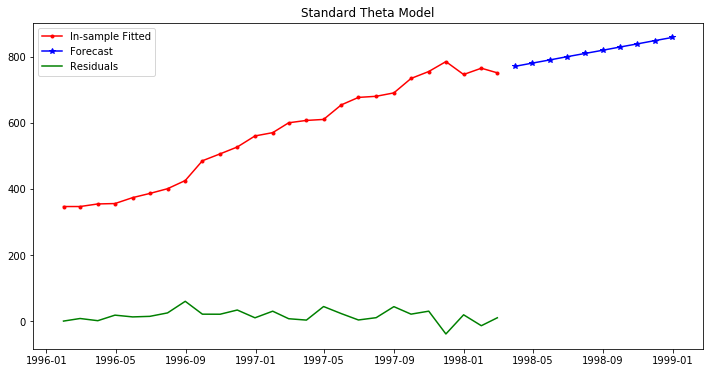

In [8]:
mean = model['mean']

fitted =  model['fitted']

residuals = model['residuals']

plt.figure(figsize = (12,6))

plt.plot(fitted, marker = '.', color = 'red', label = 'In-sample Fitted')
plt.plot(mean, marker = '*', color = 'blue', label = 'Forecast')
plt.plot(residuals, marker = '', color = 'green', label = 'Residuals')
plt.title('Standard Theta Model')
plt.legend()
plt.show()

## Aplicação do Método Theta com funções de R

In [9]:
from rpy2.robjects import r, pandas2ri
import rpy2
import matplotlib.pyplot as plt
import pandas as pd

from rpy2.robjects.packages import importr

pandas2ri.activate()

forecast = importr('forecast')
graphics = importr('graphics')

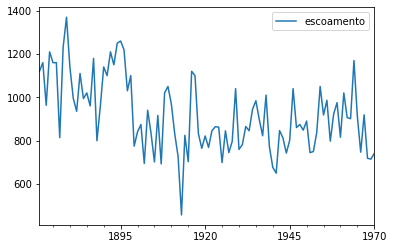

In [10]:
Nile = r['Nile']
Nile = pd.DataFrame(Nile)
Nile.index = pd.date_range(start='1871', end='1970', freq='YS')
Nile.columns = ['escoamento']
Nile.plot()

In [15]:
nile_fcast = forecast.thetaf(Nile['escoamento'])
graphics.plot(nile_fcast)

mean,[RTYPES.REALSXP]
lower,[RTYPES.REALSXP]
upper,[RTYPES.REALSXP]


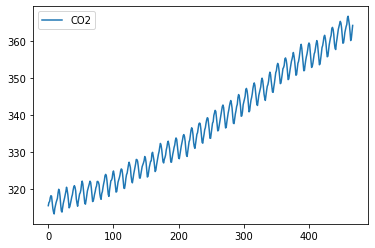

In [16]:
co2 = r['co2']
co2 = pd.DataFrame(co2)
co2.columns = ['CO2']

co2.plot()

In [17]:
co2_fcast = forecast.thetaf(co2['CO2'])
graphics.plot(co2_fcast)

mean,[RTYPES.REALSXP]
lower,[RTYPES.REALSXP]
upper,[RTYPES.REALSXP]


Métodos Theta otimizado em R

https://cran.r-project.org/web/packages/forecTheta/forecTheta.pdf

Existem outros métodos para previsão!

Veja, por exemplo, em Python

https://medium.com/intive-developers/forecasting-time-series-with-multiple-seasonalities-using-tbats-in-python-398a00ac0e8a
